# Ejercicios Tema 3 - Interpolación

In [27]:
# Ejercicios 5, 11, 27, 31, 34, 36 (LO HA DICHO EL PROFE)
# Ejemplo 2 (Hoja de Lagrange)

### Ejercicio 0

Implementa/escribe el pseudocódigo del algoritmo X de interpolación/ajuste/integración

### Ejercicio 1

Dados los puntos:

<center>

| $x$ | $y$ |
|-----|-----|
| 0 | 7 |
| 2 | 11 |
| 3 | 28 |

</center>

utiliza el método de Lagrange para determinar el valor de $y$ en $x=1$. Realiza los cálculos sin usar ordenador.

In [ ]:
# Resuelto en papel, y = 4.

### Ejercicio 2

Programa una función ```eval_newton_poly(y_data: list, x_data: list, x: float) -> float``` que devuelva el valor en ```x``` que toma el polinomio interpolante, donde ```y_data``` y ```x_data``` son respectivamente los valores $y / x$ sobre los que se construye el polinomio. Internamente, dicha función debe usar otra función ```coeffts(y_data: list, x_data: list) -> float``` (que también deberá ser programada). Esta última función simplemente evaluará los coeficientes del polinomio por el método de las diferencias divididas (Newton) y los devolverá como una lista.

### Ejercicio 3

Compara la *performance* del método de Newton y del método de Lagrange para obtener el polinomio interpolante. En particular genera varias muestras aleatorias donde varies:
  - El número de puntos (entre 5 y 70).
  - El coeficiente $R^2$ de la muestra. Puedes usar ```scipy.stats.linregress(x, y).rvalue``` para evaluarlo. (si necesitas ayuda, echa un vistazo al enunciado del ejercicio 30).

Para cada *dataset* calcula su polinomio interpolante por ambos métodos y almacena:
  - El tiempo de cálculo de los coeficientes.
  - El error absoluto de los coeficientes, medido como la máxima diferencia en valor absoluto entre cualquier par de coeficientes del polinomio.

Analiza críticamente los resultados 
  

In [29]:
from typing import Sequence

def lagrange_base(x_data: list | tuple,
                  i: int,
                  x_val: float) -> float:
    lag = 1.0
    for j in range(len(x_data)):
        if j != i:
            lag *= (x_val - x_data[j]) / (x_data[i] - x_data[j])
    return lag

def eval_lagrange(x_data: list | tuple,
                  y_data: list | tuple,
                  x_val: float) -> float:
    p = 0.0
    for i in range(len(x_data)):
        p += y_data[i] * lagrange_base(x_data, i, x_val)
    return p

In [30]:
import numpy as np

def compute_newton_coefficients(x_data, y_data):
    n = len(x_data)
    tabla = np.zeros((n, n))
    tabla[:, 0] = y_data
    for j in range(1, n):
        for i in range(j, n):
            tabla[i, j] = (tabla[i, j-1] - tabla[i-1,j-1]) / (x_data[i] - x_data[i-j])
    return np.diagonal(tabla)

def evaluate_newton_polynomial(x_data, y_data, x_val):
    coefficients = compute_newton_coefficients(x_data, y_data).astype(float)
    resul = coefficients[0]
    mult = 1.0
    for i in range(1, len(coefficients)):
        mult *= (x_val - x_data[i-1])
        resul += coefficients[i] * mult
    return resul

In [31]:
x = 0

In [32]:
import numpy as np
import time

x_10 = list(np.random.choice(range(-50, 50), size=10, replace=False))
y_10 = list(np.random.choice(range(-50, 50), size=10, replace=False))

print(x_10)
print(y_10)

[-13, -38, 35, -40, 20, -29, 5, 32, 1, 28]
[-47, 44, 13, -15, 14, 35, -1, 22, 32, -42]


In [33]:
t1 = time.time()

l_10 = eval_lagrange(x_10, y_10, x)

t2 = time.time()

n_10 = evaluate_newton_polynomial(x_10, y_10, x)

t3 = time.time()

print(f'El valor es del método de Lagrange es {l_10} y ha tardado {t2 - t1}s')
print(f'El valor es del método de Newton es {n_10} y ha tardado {t3 - t2}s')

El valor es del método de Lagrange es 42.101001399850574 y ha tardado 0.0s
El valor es del método de Newton es 42.101001399850574 y ha tardado 0.0s


In [34]:
x_30 = list(np.random.choice(range(-50, 50), size=30, replace=False))
y_30 = list(np.random.choice(range(-50, 50), size=30, replace=False))

print(x_30)
print(y_30)

[-19, 43, -35, 41, 0, 14, -43, -37, -22, 5, -33, -15, 23, 36, -11, 32, -32, 12, -20, -9, -30, 3, -39, 1, -44, 22, -12, 4, -14, -24]
[-44, 37, 7, -5, 19, -37, -29, -7, 29, 0, 6, -35, 11, -38, -30, -26, -19, -48, -32, 34, 35, -28, -25, -43, -46, -15, -14, 16, 31, 33]


In [35]:
t1 = time.time()

l_30 = eval_lagrange(x_30, y_30, x)

t2 = time.time()

n_30 = evaluate_newton_polynomial(x_30, y_30, x)

t3 = time.time()

print(f'El valor es del método de Lagrange es {l_30} y ha tardado {t2 - t1}s')
print(f'El valor es del método de Newton es {n_30} y ha tardado {t3 - t2}s')

El valor es del método de Lagrange es 19.0 y ha tardado 0.0s
El valor es del método de Newton es 18.99999999999997 y ha tardado 0.00127410888671875s


In [36]:
x_50 = list(np.random.choice(range(-50, 50), size=50, replace=False))
y_50 = list(np.random.choice(range(-50, 50), size=50, replace=False))

print(x_50)
print(y_50)

[-10, -27, -5, -49, 44, 35, 40, 7, 16, 8, 28, 36, -37, -17, 6, 26, -3, -40, 4, -7, -14, -18, 32, -46, 11, 43, 42, 12, 46, 23, -2, 45, -39, -19, -48, -33, 3, -45, 39, 9, -47, 21, -8, -1, 20, -4, -11, 18, -15, 15]
[47, -11, -40, -28, 21, -14, -25, 12, -9, 2, 49, 46, -34, -38, -37, 16, 15, -20, 23, 44, -49, 42, 38, -12, 11, -19, -36, -30, -44, 5, 3, -24, 22, 17, 40, -3, -16, -31, -8, -7, -10, -5, -46, -17, 1, -50, 7, 6, -41, -32]


In [37]:
t1 = time.time()

l_50 = eval_lagrange(x_50, y_50, x)

t2 = time.time()

n_50 = evaluate_newton_polynomial(x_50, y_50, x)

t3 = time.time()

print(f'El valor es del método de Lagrange es {l_50} y ha tardado {t2 - t1}s')
print(f'El valor es del método de Newton es {n_50} y ha tardado {t3 - t2}s')

El valor es del método de Lagrange es -37.74109295117281 y ha tardado 0.0022330284118652344s
El valor es del método de Newton es -37.74109295118043 y ha tardado 0.002270221710205078s


### Ejercicio 4

Los siguientes puntos

<center>

| $x$ | $y$ |
|-----|-----|
|  -2  |  -1  |
|  1  |  2 |
|  4  |  59 |
|  -1  |  4 |
|  3  |  24 |
|  -4  |  -53 |

</center>

caen sobre un polinomio. Determina el grado de este polinomio mediante el método de Newton, construyendo una tabla de diferencias divididas. Realiza los cálculos sin usar ordenador.

In [42]:
# Resuelto en papel, polinomio de grado 3.

x = [-2, 1, 4, -1, 3, -4]
y = [-1, 2, 59, 4, 24, -53]

print(evaluate_newton_polynomial(x, y, 0))

3.0


### Ejercicio 5

El siguiente *dataset* cae sobre la gráfica de la función $f(x) = 4.8 \cos \left(\frac{\pi x}{20} \right)$. Interpola los datos usando el método de Newton en los valores $x=0, 0.5, 1.0, \dots, 8.0$, y compara el resultado con el valor *exacto* $y_i = f(x_i)$.

<center>

| $x$  | $y$ |
|------|-----|
| 0.15 | 4.79867 |
| 2.30 | 4.49013 |
| 3.15 | 4.2243  |
| 4.85 | 3.47313 |
| 6.25 | 2.66674 |
| 7.95 | 1.51909 |

</center>

In [163]:
import math

def f(x):
    return 4.8 * math.cos((math.pi * x) / 20)

x = np.arange(0, 8.1, 0.5)
y = []
for i in x:
    y.append(f(i))

In [164]:
x_val = [0.15, 2.3, 3.15, 4.85, 6.25, 7.95]
y_real = []
for i in x_val:
    y_real.append(f(i))
y_real

[4.798667665046403,
 4.490131347983363,
 4.2243038317974335,
 3.4731349401045573,
 2.666737118494091,
 1.5190894424716135]

In [165]:
y_aprox = []
for i in x_val:
    y_aprox.append(evaluate_newton_polynomial(x, y, i))
y_aprox

[4.798667665046504,
 4.490131347983363,
 4.224303831797432,
 3.4731349401045564,
 2.6667371184940913,
 1.5190894424716552]

In [166]:
def error_relativo(x_real, x_aprox):
    return abs(x_real - x_aprox) / abs(x_real)

errores = [error_relativo(i, j) for i, j in zip(y_real, y_aprox)]

print(f'Los errores relativos de la interpolación de Newton es: {errores}')

Los errores relativos de la interpolación de Newton es: [2.1100094216429797e-14, 0.0, 4.2050877733489494e-16, 2.5572816346530636e-16, 1.6652905409020602e-16, 2.747987350763643e-14]


### Ejercicio 6

Se conoce como *interpolación inversa* cuando la variable dependiente pasa a jugar el rol de la variable independiente (y viceversa) en el contexto de un problema de interpolación. Para ilustrar este concepto, encuentra las raíces de la siguiente función $y(x)$ dada por los siguientes datos:

<center>

| $x$  | $y$ |
|------|-----|
| 0 | 1.8421 |
| 0.5 | 2.4694 |
| 1 | 2.4921  |
| 1.5 | 1.9047 |
| 2 | 0.8509 |
| 2.5 | -0.4112 |
| 3 | -1.5727 |

</center>

Utiliza interpolación de Lagrange sobre (a) tres, y (b) cuatro puntos. Utiliza solo el rango de puntos apropiado. Resuelve el problema tanto operando *a mano* como con ordenador. Sugerencia: en los cálculos *a mano* se pueden reutilizar las cuentas hechas en el apartado (a) para resolver el (b).

In [46]:
# a)
x = [0, 1, 2]
y = [1.8421, 2.4921, 0.8509]

print(eval_lagrange(x, y, 3))

-3.0815


### Ejercicio 7

La función del ejercicio anterior tiene un máximo en torno a $x = 0.77$. Encuentra dicho máximo numéricamente. Para ello, sigue el siguiente proceso:
 - Programa una función ```eval_y_piecewise_interp(y_data: list, x_data: list, x: float) -> float``` que devuelva el valor de la función en un punto ```x``` del dominio usando splines cúbicos.
 - Define una malla fina (paso $h=0.01$) llamada ```x_grid```, (es decir, ```x_grid = [0, 0.01, 0.02, ..., 3]```).
 - Calcula la derivada ```dy``` de la función en los puntos de ```x_grid```, utilizando diferencias finitas centradas de segundo orden (omite los valores en los nodos extremos)
 - Calcula dónde ```dy``` alcanza valores mínimos en valor absoluto (derivada nula). Uno de esos puntos debería estar próximo a $x = 0.77$.

In [50]:
def find_interval(x_data: list | tuple,
                  x_val: float) -> int | None:
    for i in range(len(x_data)-1):
        if x_data[i] <= x_val <= x_data[i+1]:
            return i
    return None
    

def evaluate_natural_cubic_spline(x_data: list | tuple,
                                  y_data: list | tuple,
                                  x_val: float) -> float:
    
    assert len(x_data) == len(y_data), 'Las dimensiones de los datos no son correctos'

    A = np.zeros((len(x_data), len(x_data)))
    A[0, 0] = 1
    A[-1, -1] = 1
    for i in range(1, len(x_data) - 1):
        A[i, i-1] = x_data[i-1] - x_data[i]
        A[i, i] = 2.0 * (x_data[i-1] - x_data[i+1])
        A[i, i+1] = x_data[i] - x_data[i+1]

    b = np.zeros(len(x_data))
    for i in range(1, len(x_data) - 1):
        b[i] = 6.0 * ((y_data[i-1] - y_data[i]) / (x_data[i-1] - x_data[i]) \
                   - (y_data[i] - y_data[i+1]) / (x_data[i] - x_data[i+1]))
    
    k = np.linalg.solve(A, b)

    i = find_interval(x_data, x_val)
    term1 = (k[i] / 6.0) * ( (x_val - x_data[i+1])**3 / (x_data[i] - x_data[i+1]) - (x_val - x_data[i+1]) * (x_data[i] - x_data[i+1]))
    term2 = - (k[i+1] / 6.0) * ( (x_val - x_data[i])**3 / (x_data[i] - x_data[i+1]) - (x_val - x_data[i]) * (x_data[i] - x_data[i+1]))
    term3 = (y_data[i] * (x_val - x_data[i+1]) - y_data[i+1] * (x_val - x_data[i])) / (x_data[i] - x_data[i+1])

    q = term1 + term2 + term3

    return q

In [66]:
x = [0, 0.5, 1, 1.5, 2, 2.5, 3]
y = [1.8421, 2.4694, 2.4921, 1.9047, 0.8509, -0.4112, -1.5727]

h = 0.01
x_grid = np.arange(0, 3.01, h)

def dfc_2(x, h, f):
    return (f(x + h) - f(x - h)) / (2 * h)

def f(val):
    return evaluate_natural_cubic_spline(x, y, val)

derivadas = [dfc_2(val, h, f) for val in x_grid[1:-1]]
derivadas.insert(0, 500)
derivadas.append(500)

derivadas = np.abs(derivadas)
minimo = np.argmin(derivadas)

print(f'El valor donde la derivada alcanza valores mínimos es en x = {x_grid[minimo]} con un valor de dy = {derivadas[minimo]}')

El valor donde la derivada alcanza valores mínimos es en x = 0.76 con un valor de dy = 0.0056491876923248086


### Ejercicio 8

Una función $f(x)$ aproximada por un polinomio interpolante de grado $n$ puede escribirse incluyendo su término del error como:

$$
f(x)=p_n(x)+e_n(x)=p_n(x)+\frac{f^{(n+1}(\xi)}{(n+1) !} \prod_{i=0}^n\left(x-x_i\right)
$$

donde el último sumando es el error de esta forma de interpolación, siendo $\xi$ un punto cualquiera del dominio.

Ahora, sea $f(x) = -x^2 \cdot \sqrt{1+x^2}$ y considérense los nodos $x_0 = -1$, $x_1 = 3$.

 - Escribir el polinomio interpolante (lineal) en la forma de Lagrange.
 - Programa una función que permita evaluar el polinomio anterior en un punto cualquiera en $\left[ -1, 3 \right]$
 - Aproximar $f(1)$ mediante el polinomio de Lagrange y hallar analíticamente una cota superior del error usando la fórmula anterior. Compara el resultado con el error absoluto medido.
 - Encuentra dónde se producirá el error máximo (y su valor) en el intervalo $\left[ -1, 3 \right]$.

In [179]:
# 1) Resuelto en papel

# 2)
def polinomio_interpolante(x):
    a = (2**0.5 - 9 * 10**0.5) / 4
    b = (3 * 2**0.5 + 9 * 10**0.5) / 4
    return a*x - b

# 3)
def f(x):
    return -x**2 * (1 + x**2)**0.5

val_real = f(1)
val_aprox = polinomio_interpolante(1)

error_abs = abs(val_real - val_aprox)
print(f'El error absoluto en x = 1 es: {error_abs}')

El error absoluto en x = 1 es: 13.52314268957116


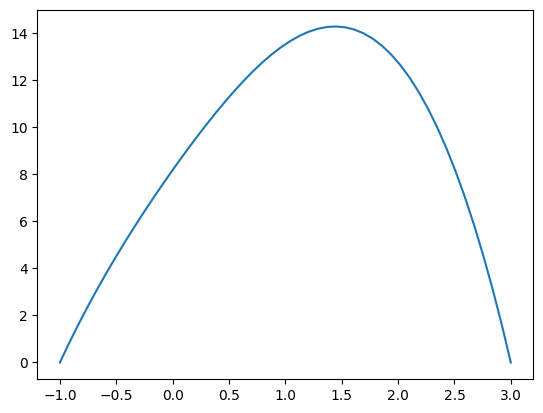

El error absoluto mayor es 14.276812064836628 y se produce en x = 1.4489795918367343


In [238]:
# 4)
import matplotlib.pyplot as plt

malla = np.linspace(-1, 3, 50)

y_real = f(malla)
y_aprox = polinomio_interpolante(malla)

errores_abs = [abs(i - j) for i, j in zip(y_real, y_aprox)]
plt.plot(malla, errores_abs)
plt.show()

print(f'El error absoluto mayor es {np.max(errores_abs)} y se produce en x = {malla[np.argmax(errores_abs)]}')

### Ejercicio 9

Calcular el polinomio interpolante de grado 3 $p_3(x)$ de la función $f(x) = \text{sen}\left( \pi x\right)$ en $[0, 1]$ usando nodos equiespaciados. Sea
$I = \int_{0}^{1} \text{sen}\left( \pi x\right) \mathrm{d}x$, calcular $\hat{I} = \int_{0}^{1} p_3(x) \mathrm{d}x$ y determinar el error relativo de $\hat{I}$ como aproximación a $I$.

In [256]:
# Resuelto en papel

# P_3(x) = -((9* 3**0.5) / 4) * x**2 + ((9* 3**0.5) / 4) * x

integral_real = 2 / np.pi
integral_aprox = (3 * 3**0.5) / 8

print(f'El error relativo de las integrales es: {error_relativo(integral_real, integral_aprox)}')

El error relativo de las integrales es: 0.020262142381747505


### Ejercicio 10

Sea $f(x) = e^{x}$ y $p_n(x)$ el polinomio interpolante usando $(n + 1)$ nodos equiespaciados, $x_0, \dots ,x_n$, en $\left[ 0, \frac{1}{2} \right]$
Estimar el valor de $n$ necesario para que $\left| f(x) - p(x) \right| < 10^{-6}$ para $x \in \left[0, \frac{1}{2} \right]$. Resuelve el ejercicio mediante experimentación numérica.

In [80]:
def f(x):
    return np.exp(x)

def cond_parada(x, y):
    for i in range(len(x)):
        if abs(y[i] - evaluate_newton_polynomial(x, y, x[i])) > 10**(-6):
            return False
    return True


n = 1
x_grid = np.linspace(0, 0.5, n+1)
y_grid = f(x_grid)

while cond_parada(x_grid, y_grid):
    n += 1
    x_grid = np.linspace(0, 0.5, n+1)
    y_grid = f(x_grid)

print(f'{n = }')

n = 57


### Ejercicio 11

Comprobar que los polinomios $p(x) = 5x^3 - 27x^2 + 45x - 21$ y $q(x) = x^4 - 5x^3 + 8x^2 - 5x + 3$ interpolan ambos los datos $(1, 2), (2, 1), (3, 6), (4, 47)$ y explicar por qué esto es compatible con la unicidad del polinomio interpolante.


In [ ]:
import numpy as np

def p(x):
    return 5 * x**3 - 27 * x**2 + 45 * x - 21

def q(x):
    return x**4 - 5 * x**3 + 8 * x**2 - 5 * x + 3

x = [1, 2, 3, 4]
y_p = [p(val) for val in x]
y_q = [q(val) for val in x]

print(f'P(x) = {y_p}')
print(f'Q(x) = {y_q}')

# Esto es compatible con la unicidad del polinomio interpolante porque el hecho
# de que exista un único polinomio interpolante de una función no significa que
# que exista otro polinomio distinto que pase por los mismos puntos que interpola
# el polinomio interpolante.

P(x) = [2, 1, 6, 47]
Q(x) = [2, 1, 6, 47]


### Ejercicio 12

Analiza si $s(x)$ es un spline cúbico con nodos -1, 0, 1 y 2:

$$
s(x)= \begin{cases}s_1(x)=1+2(x+1)+(x+1)^3 & x \in[-1,0] \\ s_2(x)=3+5 x+3 x^2 & x \in[0,1] \\ s_3(x)=11+(x-1)+3(x-1)^2+(x-1)^3 & x \in[1,2]\end{cases}
$$

### Ejercicio 13

Calcula el spline cuadrático que interpola el siguiente conjunto de puntos $(x,y)$: $(3.0, 2.5)$, $(4.5, 1.0)$, $(7.0, 2.5)$, $(9.0, 0.5)$. Utilízalo para estimar el valor en $x=5$.

In [258]:
import numpy as np

def find_interval(x_data: list | tuple,
                  x_val: float) -> int | None:
    for i in range(len(x_data)-1):
        if x_data[i] <= x_val <= x_data[i+1]:
            return i
    return None
    

def evaluate_natural_cubic_spline(x_data: list | tuple,
                                  y_data: list | tuple,
                                  x_val: float) -> float:
    
    assert len(x_data) == len(y_data), 'Las dimensiones de los datos no son correctos'

    A = np.zeros((len(x_data), len(x_data)))
    A[0, 0] = 1
    A[-1, -1] = 1
    for i in range(1, len(x_data) - 1):
        A[i, i-1] = x_data[i-1] - x_data[i]
        A[i, i] = 2.0 * (x_data[i-1] - x_data[i+1])
        A[i, i+1] = x_data[i] - x_data[i+1]

    b = np.zeros(len(x_data))
    for i in range(1, len(x_data) - 1):
        b[i] = 6.0 * ((y_data[i-1] - y_data[i]) / (x_data[i-1] - x_data[i]) \
                   - (y_data[i] - y_data[i+1]) / (x_data[i] - x_data[i+1]))
    
    k = np.linalg.solve(A, b)

    i = find_interval(x_data, x_val)
    term1 = (k[i] / 6.0) * ( (x_val - x_data[i+1])**3 / (x_data[i] - x_data[i+1]) - (x_val - x_data[i+1]) * (x_data[i] - x_data[i+1]))
    term2 = - (k[i+1] / 6.0) * ( (x_val - x_data[i])**3 / (x_data[i] - x_data[i+1]) - (x_val - x_data[i]) * (x_data[i] - x_data[i+1]))
    term3 = (y_data[i] * (x_val - x_data[i+1]) - y_data[i+1] * (x_val - x_data[i])) / (x_data[i] - x_data[i+1])

    q = term1 + term2 + term3

    return q

In [260]:
x_data = [3, 4.5, 7, 9]
y_data = [2.5, 1.0, 2.5, 0.5]

print(f'El valor por spline cúbico natural en x = 5 es: {evaluate_natural_cubic_spline(x_data, y_data, 5)}')

El valor por spline cúbico natural en x = 5 es: 1.1028897338403043


### Ejercicio 14

Considera la función $f: [-1, 1] \to \mathbb{R}$ dada por:

$$
f(x) = \left| x \right|
$$

y los puntos de interpolación (malla):
$$
x_k = -1 + \frac{2k}{n} 
$$
para $k=0,1,\dots, n$

Representa en una gráfica la función original junto con los polinomios interpolantes para $n=5, 10, 15, 20$. Utiliza también splines cúbicos naturales. Comenta los resultados.

[-1.0, -0.6, -0.2, 0.2, 0.6, 1.0]


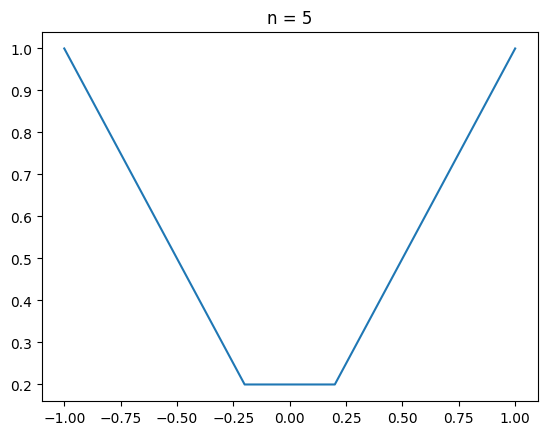

[-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]


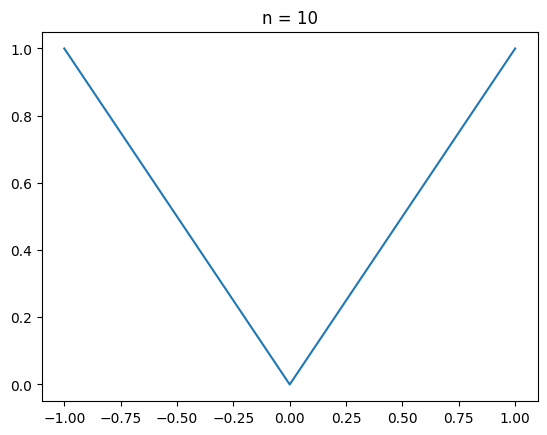

[-1.0, -0.8666666667, -0.7333333333, -0.6, -0.4666666667, -0.3333333333, -0.2, -0.0666666667, 0.0666666667, 0.2, 0.3333333333, 0.4666666667, 0.6, 0.7333333333, 0.8666666667, 1.0]


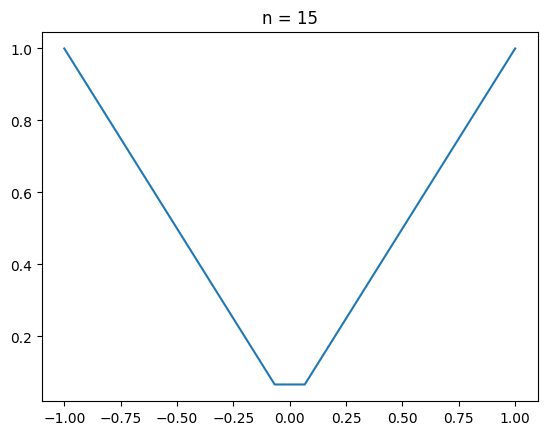

[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


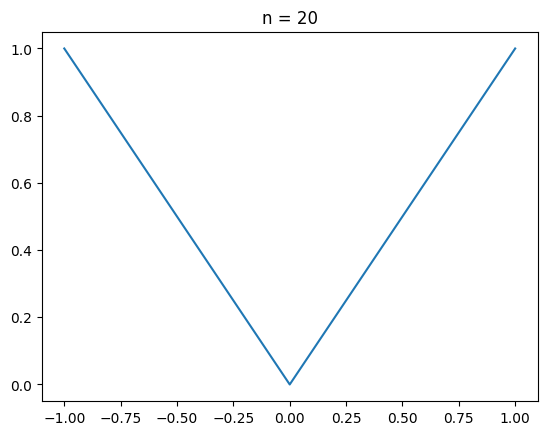

In [ ]:
import matplotlib.pyplot as plt

def f(x):
    return np.abs(x)

n = [5, 10, 15, 20]

for i in range(len(n)):
    k_vals = range(0, n[i]+1)
    x_grid = [round((-1 + (2 * k) / n[i]), 10) for k in k_vals]
    y_real = f(x_grid)
    y_aprox = [evaluate_newton_polynomial(x_grid, y_real, val) for val in x_grid]

    print(x_grid)
    plt.title(f'n = {n[i]}')
    plt.plot(x_grid, y_aprox)
    plt.show()


[-1.0, -0.6, -0.2, 0.2, 0.6, 1.0]


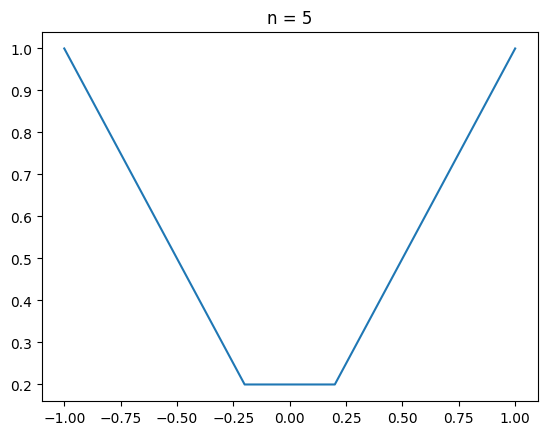

[-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]


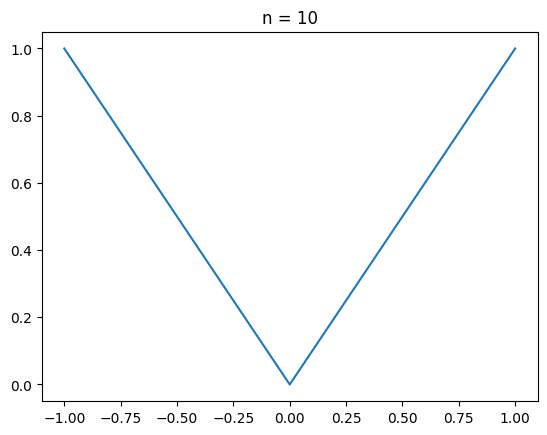

[-1.0, -0.8666666667, -0.7333333333, -0.6, -0.4666666667, -0.3333333333, -0.2, -0.0666666667, 0.0666666667, 0.2, 0.3333333333, 0.4666666667, 0.6, 0.7333333333, 0.8666666667, 1.0]


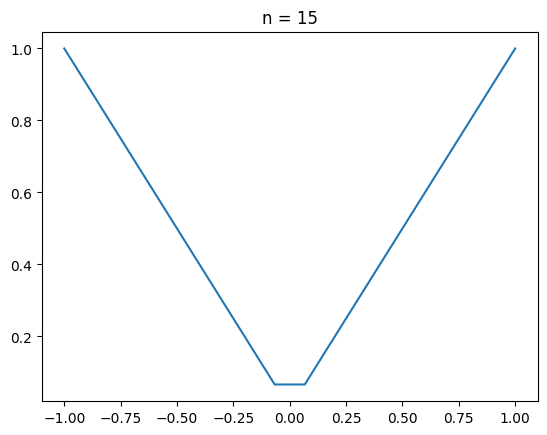

[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


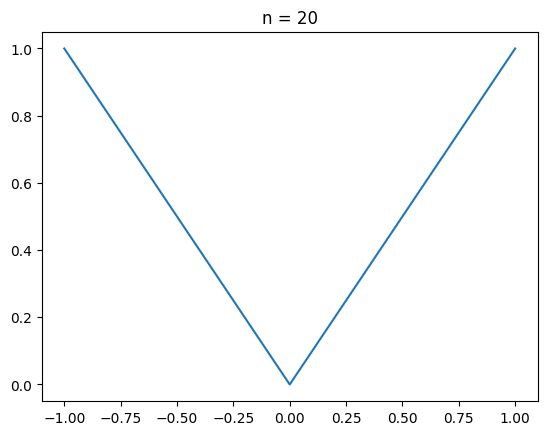

In [92]:
for i in range(len(n)):
    k_vals = range(0, n[i]+1)
    x_grid = [round((-1 + (2 * k) / n[i]), 10) for k in k_vals]
    y_real = f(x_grid)
    y_aprox = [evaluate_natural_cubic_spline(x_grid, y_real, val) for val in x_grid]

    print(x_grid)
    plt.title(f'n = {n[i]}')
    plt.plot(x_grid, y_aprox)
    plt.show()


### Ejercicio 15

Con las mismas condiciones del ejercicio anterior, utiliza una base de funciones trigonométricas para aproximar la función $f(x)$. Es decir, escribe $f(x)$ como $\sum_{k=0}^{n-1} a_k \cdot \text{sen}^k x$. Plantea un sistema de ecuaciones para resolver este problema de interpolación y resuélvelo numéricamente con ayuda del módulo ```numpy.linalg```, obteniendo la función interpolante para $n=5,10,15,20$. Analiza las gráficas de dichas funciones y compáralas con las del ejercicio anterior.

### Ejercicio 16

Dada la función $f(x) = 2 + \text{sen}^2(x)$, obtener el spline cúbico que aproxima la función en $\left[ 0, 2\pi \right]$. Para ello, crea el *dataset* de valores de $x$ e $y$ a partir de una malla ```x``` equiespaciada $x_i = 0, \frac{2\pi}{4}, 2 \cdot \frac{2\pi}{4}, 3 \cdot \frac{2\pi}{4}, 2\pi$ que marcará los extremos de los subintervalos y por tanto dónde se evaluará la función para obtener los correspondientes valores $y_i$.

Después, crea una malla fina ```x_dense``` con nodos equiespaciados de la forma $\hat{x}_i = 0, \frac{2\pi}{100}, 2 \cdot \frac{2\pi}{100}, 3 \cdot \frac{2\pi}{100}, \dots, 2\pi$. Evalúa el error relativo de la aproximación por splines cúbicos anterior frente al valor original de la función. Encuentra el punto $x$ donde el error es máximo.

In [274]:
def f(x):
    return 2 + (np.sin(x))**2

x = np.arange(0, 2.1*np.pi, 1/2*np.pi)
y = f(x)

print(x)
print(y)

[0.         1.57079633 3.14159265 4.71238898 6.28318531]
[2. 3. 2. 3. 2.]


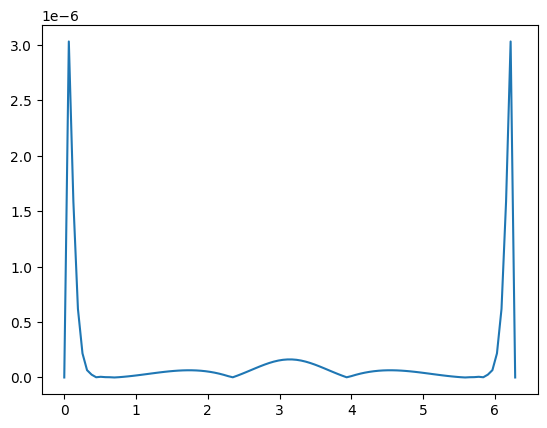

El error relativo máximo es 3.0284734493277006e-06 en x = 0.06346651825433926


In [287]:
x_dense = np.arange(0, 2.01*np.pi, 1/50*np.pi)
y_dense = f(x_dense)

x_val = np.linspace(0, 2*np.pi, 100)

val_real = f(x_val)
spline_cubico = [evaluate_natural_cubic_spline(x_dense, y_dense, i) for i in x_val]

errores_relativos = error_relativo(val_real, spline_cubico)

plt.plot(x_val, errores_relativos)
plt.show()

print(f'El error relativo máximo es {np.max(errores_relativos)} en x = {x_val[np.argmax(errores_relativos)]}')

### Ejercicio 17

Plantea y resuelve con ayuda del ordenador el sistema de ecuaciones que permite obtener el spline cúbico natural a partir de los datos $x=[0,1,2]$, $y=[1,3,2]$ (dos intervalos). Comprueba que al evaluarlo en $x=1.5$ se obtiene un valor de $2.7813$.

In [95]:
A = np.matrix([[1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, 1, 1, 1],
               [0, 0, 0, 0, 1, 2, 4, 8],
               [1, 1, 1, 1, -1, -1, -1, -1],
               [0, 1, 2, 3, 0, -1, -2, -3],
               [0, 0, 2, 6, 0, 0, -2, -6],
               [0, 0, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 2, 12]])

b = np.matrix([[1],
               [3],
               [2],
               [0],
               [0],
               [0],
               [0],
               [0]])

x = np.linalg.solve(A, b)

print(x)

# Resuelto en papel, da bien el resultado

[[ 1.  ]
 [ 2.75]
 [ 0.  ]
 [-0.75]
 [-0.5 ]
 [ 7.25]
 [-4.5 ]
 [ 0.75]]


### Ejercicio 18

Escribe una función ```lin_interp(x, y, x_new)```, donde ```x``` e ```y``` son listas que contienen puntos de datos experimentales, y ```x_new``` es otra lista. Asume que ```x``` y ```x_new``` están en orden ascendente y no tienen elementos repetidos. Dicha función debe devolver una nueva lista ```y_interp``` del mismo tamaño que ```x_new```, donde ```y_interp[i]``` es la interpolación lineal en ```x_new[i]```. No debes usar librerías externas para este ejercicio.

In [111]:
def find_interval(x_data: list | tuple,
                  x_val: float) -> int | None:
    for i in range(len(x_data)-1):
        if x_data[i] <= x_val <= x_data[i+1]:
            return i
    return None

def evaluate_lineal_interpolation(x_data, y_data, x_val):
    i = find_interval(x_data, x_val)
    return y_data[i] + ((y_data[i+1] - y_data[i]) / (x_data[i+1] - x_data[i])) * (x_val - x_data[i])

def lin_interp(x, y, x_new):
    y_interp = []
    for val in x_new:
        y_interp.append(evaluate_lineal_interpolation(x, y, val))
    return y_interp
    

x = [1, 2, 3, 4, 5]
y = [-13, 2, 6, -1, 7]

x_new = [1.5, 2.5, 3.5, 4.5, 4.9]
y_new = lin_interp(x, y, x_new)

print(y_new)

[-5.5, 4.0, 2.5, 3.0, 6.200000000000003]


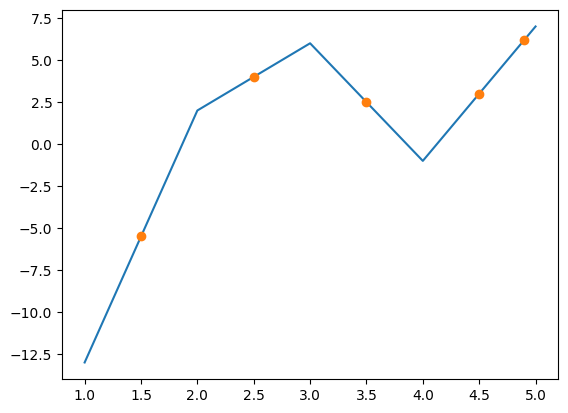

In [102]:
plt.plot(x, y)
plt.plot(x_new, y_new, 'o')
plt.show()

### Ejercicio 19

Escribe una función ```nearest_neighbor(x, y, x_new)```, donde ```x``` e ```y``` son listas que contienen puntos de datos experimentales, y ```x_new``` es otra lista. Asume que ```x``` y ```x_new``` están en orden ascendente y no tienen elementos repetidos. Dicha función debe devolver una nueva lista ```y_interp``` del mismo tamaño que ```x_new```, donde ```y_interp[i]``` es la interpolación por vecino cercano. Es decir, ```y_interp[i]``` debe ser el ```y[j]``` cuyo ```x[j]``` es el punto más cercano a ```x_new[i]```. No debes usar librerías externas para este ejercicio.

In [112]:
def evaluate_nearest_neighbor(x_data, y_data, x_val):
    i = find_interval(x_data, x_val)
    val1 = abs(x_data[i] - x_val)
    val2 = abs(x_data[i+1] - x_val)
    if val1 < val2:
        j = i
    else:
        j = i + 1
    return y_data[j]

def nearest_neighbor(x, y, x_new):
    y_interp = []
    for val in x_new:
        y_interp.append(evaluate_nearest_neighbor(x, y, val))
    return y_interp
    

x = [1, 2, 3, 4, 5]
y = [-13, 2, 6, -1, 7]

x_new = [1.4, 2.3, 3.5, 4.5, 4.9]
y_new = nearest_neighbor(x, y, x_new)

print(y_new)

[-13, 2, -1, 7, 7]


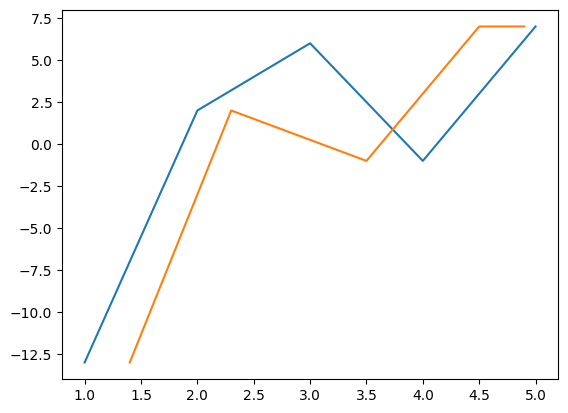

In [113]:
plt.plot(x, y)
plt.plot(x_new, y_new)
plt.show()

### Ejercicio 20

Piensa en una situación en la que el uso de la interpolación por *vecino cercano* (ejemplo anterior) sea mejor a la interpolación por spline cúbico. Pon ejemplos.

In [294]:
# La interpolación por vecino cercano es más adecuado en situaciones donde los datos 
# son categóricos o la preservación de valores exactos es más importante que la suavidad.

### Ejercicio 21

Escribe una función ```cubic_spline_slope(x, y, x_new, slope)```, donde ```x``` e ```y``` son listas que contienen puntos de datos experimentales, ```x_new``` es otra lista y ```slope``` es un número real. Asume que ```x``` y ```x_new``` están en orden ascendente y no tienen elementos repetidos. Dicha función debe devolver una nueva lista ```y_interp``` del mismo tamaño que ```x_new```, donde ```y_interp[i]``` es la interpolación por spline cúbico en ```x_new[i]```. Sin embargo, en lugar de las restricciones correspondientes al spline natural (recuerda que allí imponíamos que $S^{''}_1 \left( x_1 \right) = 0$ y $S^{''}_{n-1} \left( x_n \right) = 0$) impón que la primera derivada del spline en los puntos extremos debe ser igual a ```slope```.

In [119]:
def evaluate_cubic_spline_slope(x_data: list | tuple,
                                  y_data: list | tuple,
                                  slope: float,
                                  x_val: float) -> float:
    
    assert len(x_data) == len(y_data), 'Las dimensiones de los datos no son correctos'

    A = np.zeros((len(x_data), len(x_data)))
    A[0, 0] = 2 * (x_data[1] - x_data[0])
    A[0, 1] = (x_data[1] - x_data[0])
    A[-1, -2] = (x_data[-2] - x_data[-1])
    A[-1, -1] = 2 * (x_data[-2] - x_data[-1])
    for i in range(1, len(x_data) - 1):
        A[i, i-1] = x_data[i-1] - x_data[i]
        A[i, i] = 2.0 * (x_data[i-1] - x_data[i+1])
        A[i, i+1] = x_data[i] - x_data[i+1]

    b = np.zeros(len(x_data))
    b[0] = 6 * ((y_data[1] - y_data[0]) / (x_data[1] - x_data[0]) - slope)
    b[-1] = 6 * (slope - (y_data[-1] - y_data[-2]) / (x_data[-1] - x_data[-2]))
    for i in range(1, len(x_data) - 1):
        b[i] = 6.0 * ((y_data[i-1] - y_data[i]) / (x_data[i-1] - x_data[i]) \
                   - (y_data[i] - y_data[i+1]) / (x_data[i] - x_data[i+1]))
    
    k = np.linalg.solve(A, b)

    i = find_interval(x_data, x_val)
    term1 = (k[i] / 6.0) * ( (x_val - x_data[i+1])**3 / (x_data[i] - x_data[i+1]) - (x_val - x_data[i+1]) * (x_data[i] - x_data[i+1]))
    term2 = - (k[i+1] / 6.0) * ( (x_val - x_data[i])**3 / (x_data[i] - x_data[i+1]) - (x_val - x_data[i]) * (x_data[i] - x_data[i+1]))
    term3 = (y_data[i] * (x_val - x_data[i+1]) - y_data[i+1] * (x_val - x_data[i])) / (x_data[i] - x_data[i+1])

    q = term1 + term2 + term3

    return q

def cubic_spline_slope(x, y, x_new, slope):
    y_interp = []
    for val in x_new:
        y_interp.append(evaluate_cubic_spline_slope(x, y, slope, val))
    return y_interp

x = [1, 2, 3, 4, 5]
y = [-13, 2, 6, -1, 7]
slope = 0

x_new = [1.4, 2.3, 3.5, 4.5, 4.9]
y_new = cubic_spline_slope(x, y, x_new, slope)

print(y_new)

[-9.225142857142858, 5.528749999999999, 2.013392857142857, 0.7723214285714288, 5.463607142857148]


### Ejercicio 22

Escriba una función ```quintic_spline(x, y, x_new)```, donde ```x``` e ```y``` son listas que contienen puntos de datos experimentales, y ```x_new``` es otra lista. Asume que ```x``` y ```x_new``` están en orden ascendente y no tienen elementos repetidos. Dicha función debe devolver una nueva lista ```y_interp``` del mismo tamaño que ```x_new```, donde ```y_interp[i]``` es la interpolación por spline de orden 5 en ```x_new[i]```. Tendrás que utilizar restricciones adicionales en los extremos para obtener suficientes ecuaciones. Fija dichas restricciones libremente.


### Ejercicio 24

Mediante el cálculo de la tabla de diferencias divididas correspondiente, calcula el polinomio de Hermite para el siguiente dataset

<center>

| $i$  | $x_i$ | $y_i$ | $y'_i$ |
|------|-------|-------|--------|
| 0    | 8.3   | 17.56492 | 3.116256|
| 1    | 8.6   | 18.50515 | 3.151762|

</center>

Los datos anteriores se han obtenido usando la función $f(x) = x \ln x$. Utiliza el polinomio de Hermite para aproximar $f(8.4)$ y calcula el error absoluto de esta aproximación.

In [13]:
def f(x):
    return x * np.log(x)

# Resuelto en papel
def pol_hermite(x):
    return 17.56492 + 3.116256 * (x - 8.3) + 0.05948 * (x - 8.3)**2 - 0.002022 * (x - 8.3)**2 * (x - 8.6)

x = 8.4

y_real = f(x)
y_aprox = pol_hermite(x)
error = abs(y_real - y_aprox)

print(f'El valor aproximado de la función con el polinomio de Hermite en x = {x} es P(x) = {y_aprox} con un error de {error}')

El valor aproximado de la función con el polinomio de Hermite en x = 8.4 es P(x) = 17.877144444 con un error de 1.88513385168676e-06


### Ejercicio 25

Mediante el cálculo de la tabla de diferencias divididas correspondiente, calcula el polinomio de Hermite para el siguiente dataset

<center>

| $i$  | $x_i$ | $y_i$ | $y'_i$ |
|------|-------|-------|--------|
| 0    | -0.5   | -0.0247500 | 0.7510000|
| 1    | -0.25   | 0.3349375 | 2.1890000|
| 2    | 0   | 1.1010000 | 4.0020000|
</center>

Los datos anteriores se han obtenido usando la función $f(x) = x^3 + 4.001 x^2 + 4.002 x + 1.101$. Utiliza el polinomio de Hermite para aproximar $f(-1/3)$ y calcula el error absoluto de esta aproximación. 

In [125]:
# Resuelto en papel
import numpy as np
import math

def f(x):
    return x**3 + 4.001 * x**2 + 4.002 * x + 1.101

def compute_hermite_coefficients(x_data, data):
    # Obtenemos la lista de f[x_i] según el número de derivadas que tenga x_i
    new = []
    for i in range(len(data)):
        new += [data[i][0]] * len(data[i])
    coefficients = new

    new = []
    for i in range(len(data)):
        new += [data[i]] * len(data[i])
    data = new
    
    n = len(coefficients)
    tabla = np.zeros((n, n))
    tabla[:, 0] = coefficients
    for j in range(1, n):
        for i in range(j, n):
            if x_data[i] - x_data[i-j] == 0:
                tabla[i, j] = data[i][j] / math.factorial(j)
            else:
                tabla[i, j] = (tabla[i, j-1] - tabla[i-1,j-1]) / (x_data[i] - x_data[i-j])
    return np.diagonal(tabla)

def evaluate_hermite_polynomial(x_data, data, x_val):
    new = []
    for i in range(len(x_data)):
        new += [x_data[i]] * len(data[i])
    x_data = new
    coefficients = compute_hermite_coefficients(x_data, data).astype(float)
    resul = coefficients[0]
    mult = 1.0
    for i in range(1, len(coefficients)):
        mult *= (x_val - x_data[i-1])
        resul += coefficients[i] * mult
    return resul

x_data = [-0.5, -0.25, 0]
data = [[-0.02475, 0.751], [0.3349375, 2.189], [1.101, 4.002]]

x = -1/3
y_aprox = evaluate_hermite_polynomial(x_data, data, x)
y_real = f(x)

error = abs(y_real - y_aprox)
print(f'El valor aproximado por el polinomio interpolante de Hermite es P({x}) = {y_aprox}, con un error de {error}')

El valor aproximado por el polinomio interpolante de Hermite es P(-0.3333333333333333) = 0.17451851851851852, con un error de 2.220446049250313e-16


### Ejercicio 26

¿Es posible determinar un polinomio único de grado $\le 3$ que interpole los siguientes datos?
 - **(a)** $p(0)=f(0) ;\quad p(1)=f(1) ; \quad p^{\prime}(-1)=f^{\prime}(-1) ; \quad p^{\prime \prime}(0)=f^{\prime \prime}(0)$

 - **(b)** $p(0)=f(0) ;\quad p^{\prime}(-1)=f^{\prime}(-1) ; \quad p^{\prime}(0)=f^{\prime}(0) ; \quad p^{\prime \prime}(-1 / 2)=f^{\prime \prime}(-1 / 2)$

### Ejercicio 27

El siguiente bloque de código define y dibuja el *cuarteto de Ascombe*, un *dataset* creado explicitamente para ilustrar que el mero cálculo de la recta de regresión no es suficiente para explicar la naturaleza de los datos. En el cuarteto, aparecen 4 conjuntos de puntos, todos ellos ajustados con la misma recta de regresión, pero todos presentando una naturaleza muy disitinta:

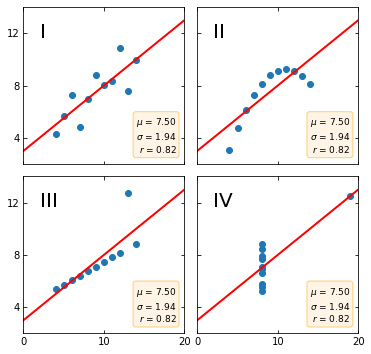

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

Explica, a tu juicio, en cuáles de los cuatro conjuntos de puntos el modelo lineal es acertado. Cuando no lo sea, explica por qué.

### Ejercicio 28

En el cuarteto de Ascombe (ver ejercicio anterior), el tercer conjunto de puntos presenta una naturaleza muy particular: todos los puntos ajustan muy bien a una determinada recta menos uno. Cuando pocos puntos están muy alejados de la tendencia general, se les llama *outliers*. En la práctica, qué hacer con dichos outliers queda a criterio del científico, pero muchas veces se opta por eliminarlos. 

Crea una función ```regression_outliers_removal(x:list, y:list)``` que calcule la recta de regresión pero que para su cálculo elimine un máximo de UN outlier. Para ello, procede de la siguiente forma. Comienza calculando el coeficiente de correlación para el *dataset* ```x``` / ```y``` original. Después, calcula también el coeficiente de correlación para todos los datasets resultantes de eliminar un único punto de ```x``` / ```y```, comprobando en esos casos si es al menos un 10% mejor que el original y mejor que el resto de los calculados para estos *datasets* reducidos. El *dataset* seleccionado finalmente es el que se usará para el ajuste lineal. La función debe devolver los dos coeficientes de la recta de ajuste en formato tupla.

Comprueba que tu implementación funciona correctamente con el conjunto 3 del *dataset* de Anscombe.


### Ejercicio 29

Calcula *a mano* la recta de regresión para los siguientes datos
<center>

| $x$ | $y$ |
|-----|-----|
|  -2  |  -1  |
|  1  |  2 |
|  4  |  4
|  5 |  4 |

</center>

Comprueba el resultado calculando computacionalmente los coeficientes de la recta.

In [129]:
# Resuelto en papel
# y_hat = 47/60 + 11/15 * x

def evaluate_linear_regression(x_data, y_data, x_val):
    x_media = np.mean(x_data)
    y_media = np.mean(y_data)

    dividendo = divisor = 0

    for i in range(len(x_data)):
        dividendo += y_data[i] * (x_data[i] - x_media)
        divisor += x_data[i] * (x_data[i] - x_media)

    b = dividendo / divisor
    a = y_media - x_media * b

    return a + b * x_val

x = [-2, 1, 4, 5]
y = [-1, 2, 4, 4]

print(evaluate_linear_regression(x, y, 0))
# Correcto

0.7833333333333334


### Ejercicio 30

El siguiente *dataset* depende de un parámetro ```k```, que inicialmente se fija en $0.25$:

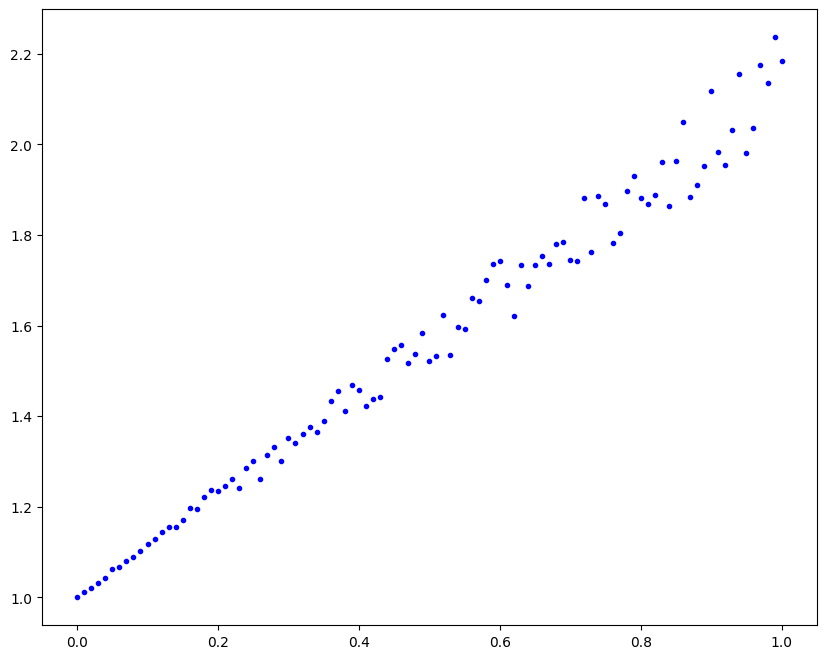

In [296]:
import matplotlib.pyplot as plt
import numpy as np

k = 0.25
x = np.linspace(0, 1, 101)
y = 1 + x + k * x * np.random.random(len(x))

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')

Estudia la calidad del ajuste lineal (medida a través del coeficiente de determinación $R^2$) en función del parámetro ```k``` en el intervalo $\left[0.25, 25 \right]$

In [305]:
def evaluate_linear_regression(x_data, y_data, x_val):
    x_media = np.mean(x_data)
    y_media = np.mean(y_data)

    dividendo = divisor = 0

    for i in range(len(x_data)):
        dividendo += y_data[i] * (x_data[i] - x_media)
        divisor += x_data[i] * (x_data[i] - x_media)

    b = dividendo / divisor
    a = y_media - x_media * b

    return a + b * x_val

def evaluate_r2(y_data, y_pred):
    y_media = np.mean(y_data)
    rss = tss = 0

    for i in range(len(y_data)):
        rss += (y_data[i] - y_pred[i])**2
        tss += (y_data[i] - y_media)**2
    
    return 1 - rss / tss


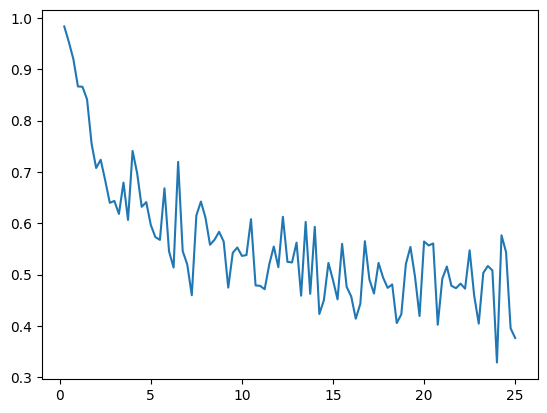

In [ ]:
k = np.linspace(0.25, 25, 100)
x = np.linspace(0, 1, 101)
r2_scores = []

for i in k:
    y = 1 + x + i * x * np.random.random(len(x))
    y_pred = [evaluate_linear_regression(x, y, val) for val in x]
    r2_scores.append(evaluate_r2(y, y_pred))

plt.plot(k, r2_scores)
plt.show()

# Con este gráfico podemos deducir que valores de k mayores producen una peor calidad en el ajuste lineal

### Ejercicio 31

Ajusta mediante polinomios de grado desde 1 hasta 6 el siguiente *dataset*:

In [130]:
import numpy as np

x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

Puedes utilizar librerías preprogramadas para los cálculos. Para cada polinomio, calcula sus coeficientes y el coeficiente de determinación $R^2$ para evaluar la bondad del ajuste.

El coeficiente de determinación para el polinomio de ajuste de grado 1 es: R^2 = 0.5376
El coeficiente de determinación para el polinomio de ajuste de grado 2 es: R^2 = 0.5523
El coeficiente de determinación para el polinomio de ajuste de grado 3 es: R^2 = 0.9356
El coeficiente de determinación para el polinomio de ajuste de grado 4 es: R^2 = 0.9827
El coeficiente de determinación para el polinomio de ajuste de grado 5 es: R^2 = 0.9838
El coeficiente de determinación para el polinomio de ajuste de grado 6 es: R^2 = 0.9944


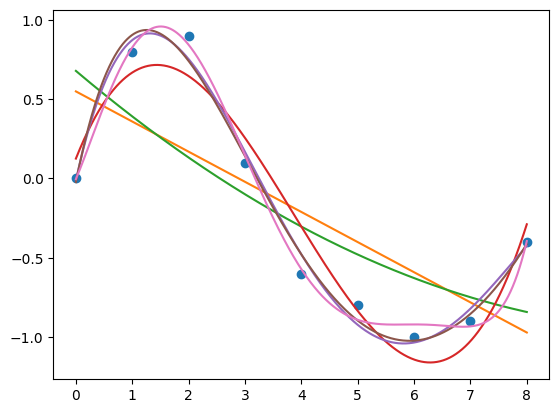

In [143]:
def evaluate_r2(y_data, y_pred):
    y_media = np.mean(y_data)
    rss = tss = 0

    for i in range(len(y_data)):
        rss += (y_data[i] - y_pred[i])**2
        tss += (y_data[i] - y_media)**2
    
    return 1 - (rss / tss)

plt.plot(x_d, y_d, 'o')
x_suave = np.linspace(0, 8, 1000)
for i in range(1, 7):
    pol = np.polyfit(x_d, y_d, i)

    y_pred = np.polyval(pol, x_suave)
    plt.plot(x_suave, y_pred)

    y_hat = np.polyval(pol, x_d)
    r2 = evaluate_r2(y_d, y_hat)
    print(f'El coeficiente de determinación para el polinomio de ajuste de grado {i} es: R^2 = {r2:.4f}')

plt.show()

### Ejercicio 32

Observa el siguiente *dataset* donde los datos presentan una naturaleza exponencial:

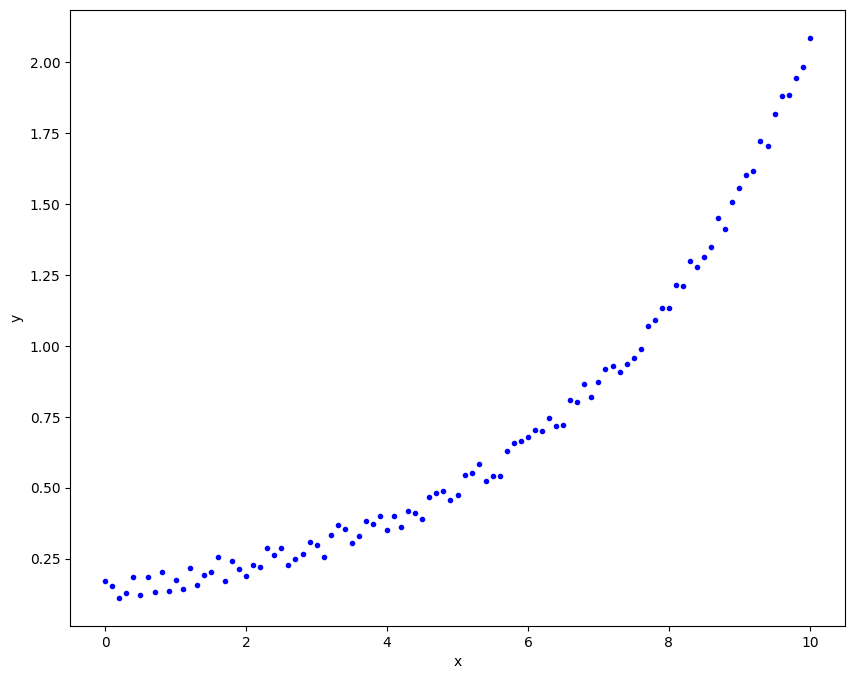

In [311]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Ajusta los datos a una función de la forma $\hat{y} = \alpha e^{\beta x}$. Parte de las fórmulas/funciones de regresión lineal y piensa en qué modificaciones debes hacer.

In [ ]:
# Si tomamos logaritmo neperiano a cada lado tenemos: ln(y_hat) = ln(alpha) + beta * x
# Llamando 𝑌 = ln(y_hat), A = ln(alpha), tenemos la ecuación lineal:
# 𝑌 = A + beta * x

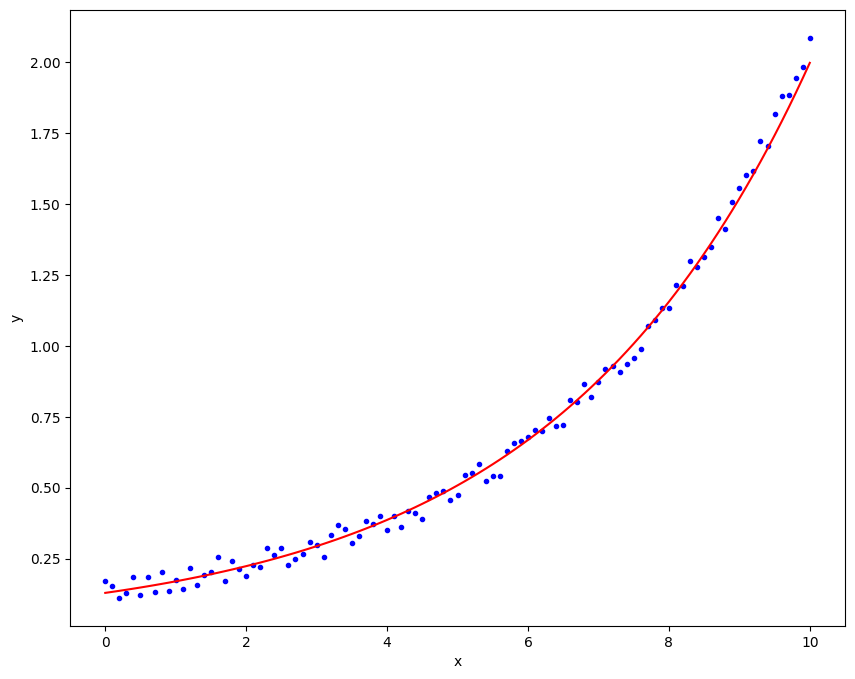

In [317]:
def evaluate_exponential_regression(x_data, y_data, x_val):
    Y_data = np.log(y_data)

    x_media = np.mean(x_data)
    Y_media = np.mean(Y_data)

    dividendo = divisor = 0

    for i in range(len(x_data)):
        dividendo += Y_data[i] * (x_data[i] - x_media)
        divisor += x_data[i] * (x_data[i] - x_media)

    beta = dividendo / divisor
    A = Y_media - x_media * beta

    alpha = np.exp(A)

    return alpha * np.exp(beta * x_val)

y_pred = [evaluate_exponential_regression(x, y, val) for val in x]

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Ejercicio 33

Para construir un pseudocódigo que calcule la tabla de diferencias divididas conviene escribirla en la siguiente forma:

$$
\begin{array}{ccccccc}
& & j= 0 & j=1 & j=2 & & j=n \\
i=0 & x_0 & f\left[x_0\right] & & & & \\
i=1 & x_1 & f\left[x_1\right] & f\left[x_0, x_1\right] & & & \\
i=2 & x_1 & f\left[x_2\right] & f\left[x_1, x_2\right] & f\left[x_0, x_1, x_2\right] & & \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \\
i=n & x_n & f\left[x_n\right] & f\left[x_{n-1}, x_n\right] & f\left[x_{n-2}, x_{n-1}, x_n\right] & & f\left[x_0, \ldots, x_n\right]
\end{array}
$$


Los valores de las diferencias pueden almacenarse en una matriz $a[0:n, 0:n]$ mediante la asignación:

$$
a_{i j}=f\left[x_{i-j}, x_{i-j+1}, \ldots, x_i\right]=\frac{a_{i, j-1}-a_{i-1, j-1}}{x_i-x_{i-j}}
$$

Los coeficientes del polinomio interpolante siguen siendo los primeros elementos de cada columna, y están almacenados en la diagonal principal. 

Escribir una función ```tabla_dd(x:list, y:list)``` que calcule la tabla de diferencias divididas y devuelva los coeficientes del polinomio interpolante.



In [ ]:
def tabla_dd(x_data, y_data):
    n = len(x_data)
    tabla = np.zeros((n, n))
    tabla[:, 0] = y_data
    for j in range(1, n):
        for i in range(j, n):
            tabla[i, j] = (tabla[i, j-1] - tabla[i-1,j-1]) / (x_data[i] - x_data[i-j])
    return np.diagonal(tabla)

x = [-2, 1, 4, -1, 3, -4]
y = [-1, 2, 59, 4, 24, -53]

tabla_dd(x, y)

array([-1.,  1.,  3.,  1.,  0.,  0.])

### Ejercicio 34

Completar la siguiente tabla de diferencias divididas:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=completar_tabla_dd.png&t=KXn0DeZtkR8CK5V&scalingup=0" width="440"/>
</div>
</center>

In [ ]:
# ¡¡Solución!!
# -21   0       -22     6     5
# -21   -22     2       21
# 1     -18     23
# -53   28
# -81 

# Resuelto en papel

### Ejercicio 35

Utiliza las fórmulas compuestas del Trapecio y de Simpson con el número indicado de subintervalos para aproximar las siguientes integrales. Realiza los cálculos *a mano* y comprueba los resultados utilizando alguna librería numérica ya programada:
 - $\int_0^2 \frac{2}{x^2+4} d x, \quad n=6$
 - $\int_3^5 \frac{1}{\sqrt{x^2-4}} d x, \quad n=8$
 - $\int_{-2}^2 x^3 e^x d x, \quad n=4$

In [147]:
# a)

def f(x):
    return 2 / (x**2 + 4)

def metodo_trapecio(a, b, f):
    h = b - a
    return h / 2 * (f(a) + f(b))

def metodo_trapecio_compuesto(a, b, n, f):
    malla = np.linspace(a, b, n+1)

    resul = 0
    for i in range(0, len(malla)-1):
        resul += metodo_trapecio(malla[i], malla[i+1], f)

    return resul

integral_aprox = metodo_trapecio_compuesto(0, 2, 6, f)
print(f'El valor aproximado de la integral por el método del trapecio es I = {integral_aprox}')

El valor aproximado de la integral por el método del trapecio es I = 0.7842407666178158


In [150]:
# b)

def f(x):
    return 1 / (x**2 - 4)**0.5

def metodo_simpson(a, b, f):
    h = (b - a) / 2
    return h / 3 * (f(a) + 4 * f((a + b) / 2) + f(b))

def metodo_simpson_compuesto(a, b, n, f):
    malla = np.linspace(a, b, n+1)

    resul = 0
    for i in range(0, len(malla)-1, 2):
        if i + 2 < len(malla):
            resul += metodo_simpson(malla[i], malla[i+2], f)
        else:
            resul += metodo_trapecio(malla[i], malla[i+1], f)

    return resul

a = 3
b = 5
n = 8

integral_aprox_trapecio = metodo_trapecio_compuesto(a, b, n, f)
integral_aprox_simpson = metodo_simpson_compuesto(a, b, n, f)

print(f'El valor aproximado de la integral por el método del trapecio es I = {integral_aprox_trapecio}')
print(f'El valor aproximado de la integral por el método de simpson es I = {integral_aprox_simpson}')

El valor aproximado de la integral por el método del trapecio es I = 0.6054975145421462
El valor aproximado de la integral por el método de simpson es I = 0.604394076297428


In [151]:
# c)

def f(x):
    return x**3 * np.exp(x)

integral_aprox = metodo_simpson_compuesto(-2, 2, 4, f)
print(f'El valor aproximado de la integral por el método de simpson es I = {integral_aprox}')

El valor aproximado de la integral por el método de simpson es I = 22.477125358234236


### Ejercicio 36

Determinar qué paso $h$ debe fijarse para aproximar con error menor que $10^{-6}$ la integral $\int_0^2 \frac{1}{x+4} dx$ mediante
 - **(a)** la fórmula compuesta del Trapecio.
 - **(b)** la fórmula compuesta de Simpson.

Comprueba tus resultados mediante algún test numérico

In [3]:
import numpy as np
def f(x):
    return 1 / (x + 4)

a = 0
b = 2
integral_real = np.log(3/2)

In [4]:
def error_absoluto(x_real, x_aprox):
    return abs(x_real - x_aprox)

In [5]:
# a)

def metodo_trapecio(a, b, f):
    h = b - a
    return h / 2 * (f(a) + f(b))

def metodo_trapecio_compuesto(a, b, n, f):
    malla = np.linspace(a, b, n+1)

    resul = 0
    for i in range(0, len(malla)-1):
        resul += metodo_trapecio(malla[i], malla[i+1], f)

    return resul

integral_aprox = 0
n = 1

while (error:= error_absoluto(integral_real, integral_aprox)) > 10**(-6):
    integral_aprox = metodo_trapecio_compuesto(a, b, n, f)
    n += 1

h = (b - a) / n

print(f'El valor de la integral por el método del trapecio es I = {integral_aprox}, con un error absoluto de {error} y paso h = {h}')


El valor de la integral por el método del trapecio es I = 0.40546610039539355, con un error absoluto de 9.922872291623364e-07 y paso h = 0.01834862385321101


In [6]:
# b)

def metodo_simpson(a, b, f):
    h = (b - a) / 2
    return h / 3 * (f(a) + 4 * f((a + b) / 2) + f(b))

def metodo_simpson_compuesto(a, b, n, f):
    malla = np.linspace(a, b, n+1)

    resul = 0
    for i in range(0, len(malla)-1, 2):
        if i + 2 < len(malla):
            resul += metodo_simpson(malla[i], malla[i+2], f)
        else:
            resul += metodo_trapecio(malla[i], malla[i+1], f)

    return resul

integral_aprox = 0
n = 1

while (error:= error_absoluto(integral_real, integral_aprox)) > 10**(-6):
    integral_aprox = metodo_simpson_compuesto(a, b, n, f)
    n += 1

h = (b - a) / n

print(f'El valor de la integral por el método de simpson es I = {integral_aprox}, con un error absoluto de {error} y paso h = {h}')


El valor de la integral por el método de simpson es I = 0.4054655120259508, con un error absoluto de 4.039177864401111e-07 y paso h = 0.2222222222222222


### Ejercicio 37

Prueba numéricamente que las fórmulas de integración de Gauss consiguen realizar integrales exactas para polinomios de hasta grado $2n+1$. El número de nodos es $n+1$. Prueba con $n=2, \dots,  5$, con polinomios arbitrarios integrados de $-1$ a $1$. Recuerda que, en ese caso, tanto las posiciones de los nodos como sus pesos están tabulados (ver apuntes).

### Ejercicio 38

Las integrales del tipo $\int_0^\infty f(x) dx$ pueden abordarse mediante un cambio de variable. Calcula mediante la fórmula de Simpson con $n=6$ y el cambio $x=1/t$ las siguientes integrales
- **(a)** $\int_1^{\infty} \frac{\cos x}{x^3} \mathrm{~d} x$
- **(b)** $\int_1^{\infty} \frac{1}{x^2+9} \mathrm{~d} x$ (comparar con el valor exacto)
- **(c)** $\int_0^{\infty} \frac{1}{x^4+1} \mathrm{~d} x$ (descomponer previamente en $\int_0^1 + \int_1^\infty$ y comparar con el valor exacto $\sqrt{2} \pi /4$).


In [11]:
n = 6

# a)

def f(t):
    if t == 0:
        return 0
    return t * np.cos((1 / t))

a = 0
b = 1

integral_aprox = metodo_simpson_compuesto(a, b, n, f)

print(f'El valor de la integral por el método de simpson es I = {integral_aprox}, con n = {n} subintervalos')


El valor de la integral por el método de simpson es I = 0.05501681166405466, con n = 6 subintervalos


In [13]:
# b)

def f(t):
    return 1 / (1 + 9 * t**2)

a = 0
b = 1

integral_real = 0.41634859
integral_aprox = metodo_simpson_compuesto(a, b, n, f)

error = error_absoluto(integral_real, integral_aprox)

print(f'El valor de la integral por el método de simpson es I = {integral_aprox}, con un error de {error} y n = {n} subintervalos')


El valor de la integral por el método de simpson es I = 0.4156940760389037, con un error de 0.0006545139610963369 y n = 6 subintervalos


In [15]:
# c)

def f(x):
    return g(x) + h(x)

def g(x):
    return 1 / (x**4 + 1)

def h(t):
    return t**2 / (1 + t**4)

a = 0
b = 1

integral_real = (2**0.5 * np.pi) / 4
integral_aprox = metodo_simpson_compuesto(a, b, n, f)

error = error_absoluto(integral_real, integral_aprox)

print(f'El valor de la integral por el método de simpson es I = {integral_aprox}, con un error de {error} y n = {n} subintervalos')


El valor de la integral por el método de simpson es I = 1.1107741816289824, con un error de 5.344708939092335e-05 y n = 6 subintervalos


### Ejercicio 39

Utilizando las fórmulas simples (un único subintervalo $[0,1]$) del Trapecio y de Simpson, aproxima:
$$
\int_0^1 \frac{\sin x}{x} dx
$$
y da una cota para el error cometido en cada caso

In [160]:
def f(x):
    if x == 0:
        return 1
    return np.sin(x) / x

a = 0
b = 1
n = 1

integral_real = 0.9461
integral_aprox_trapecio = metodo_trapecio_compuesto(a, b, n, f)
integral_aprox_simpson = metodo_simpson_compuesto(a, b, n, f)

error_trapecio = abs(integral_real - integral_aprox_trapecio)
error_simpson = abs(integral_real - integral_aprox_simpson)

print(f'El valor de la integral por el método del trapecio es I = {integral_aprox_trapecio}, con un error de {error_trapecio}')
print(f'El valor de la integral por el método de simpson es I = {integral_aprox_simpson}, con un error de {error_simpson}')

El valor de la integral por el método del trapecio es I = 0.9207354924039483, con un error de 0.0253645075960518
El valor de la integral por el método de simpson es I = 0.9207354924039483, con un error de 0.0253645075960518


### Ejercicio 40

Con ayuda del ordenador, calcula la siguiente integral utilizando el método del Trapecio y de Simpson:
$$
\int_0^{1} e^{-x^2} dx
$$
con un error inferior a $10^{-4}$ (estudiar previamente, en cada caso, cuál debe ser el número de subintervalos).

In [375]:
integral_real = 0.74682

def f(x):
    return np.e ** (-x**2)

a = 0
b = 1

In [400]:
integral_aprox = 0
n = 1

while (error:= error_absoluto(integral_real, integral_aprox)) > 10**(-4):
    integral_aprox = metodo_trapecio_compuesto(a, b, n, f)
    n += 1

print(f'El valor de la integral por el método del trapecio es I = {integral_aprox}, con un error absoluto de {error} y n = {n} subintervalos')


El valor de la integral por el método del trapecio es I = 0.405560733098033, con un error absoluto de 9.562498986859236e-05 y n = 12 subintervalos


In [385]:
integral_aprox = 0
n = 1

while (error:= error_absoluto(integral_real, integral_aprox)) > 10**(-4):
    integral_aprox = metodo_simpson_compuesto(a, b, n, f)
    n += 1

print(f'El valor de la integral por el método de simpson es I = {integral_aprox}, con un error absoluto de {error} y n = {n} subintervalos')


El valor de la integral por el método de simpson es I = 0.7468553797909873, con un error absoluto de 3.5379790987222215e-05 y n = 5 subintervalos
